<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 21pt; margin-bottom: 0.3em;"><b> Computational Task 1: Root-Finding</div>
<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 12.5pt;">Kyle Aaron Coloma</div>
<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 12.5pt;">Jason Harvey Lorenzo</div>

Outline of Root Finding Techniques


---
##
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
Error Analysis
</b>
</div>

This error analysis computes for the approximate error of the current and previous iteration and stores them in an array.

In [51]:
#Function that computes error and tabulizes x, f(x), approximate error, and true error (if true root is available) per iteration
using DataFrames

function tabulize(x_values,y_values,trueroot=nothing)
    iterations = length(x_values)
    approx_errors = Float64[NaN]
    true_errors=Float64[]
    ea=0.
    i=2

    while i<iterations+1
        ea = abs((x_values[i]-x_values[i-1])/x_values[i])*100
        push!(approx_errors, ea)
        i+=1
    end

    if trueroot==nothing
        df = DataFrame(x=x_values, f_x=y_values, Approximate_error = approx_errors)
    else
        et=0.
        i=1
        while i<iterations
            et = abs((trueroot - x_values[i])/trueroot)*100
            push!(true_errors, ea)
            i+=1
        end
        df = DataFrame(x=x_values, f_x=y_values, Approximate_error = approx_errors, True_error = true_errors)
    end
    return df
end

tabulize (generic function with 2 methods)

---
## 
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
Fixed Point Iteration 
</b>
</div>

The fixed-point iteration method (also known as one-point iteration or successive substitution) is an iterative numerical technique used to find the fixed points (also known as roots or solutions) of a given function. In other words, it is a method for finding the values of $x$ for which $f(x) = x$.


---
<b> Algorithm for Fixed Point Iteration </b>

1. Make an initial guess.

2. Compute for $x_{n+1}=g(x_n)$

3. Make the following evaluation:

    (a) If the absolute difference between $x_{n+1}$ and $x_n$ is less than the tolerance value, stop and the final value of $x$ is the approximate root of equation $f(x)=0$.

    (b) If the absolute difference between $x_{n+1}$ and $x_n$ is greater than or equal to the tolerance value, set $x_n=x_{n+1}$ return to step 2.
---

<b> Julia Code for Fixed-Point Method </b>

The function code implements the algorithm for Fixed-Point Method, with an additional input of the maximum number of iterations. The maximum number of iterations is crucial to limit the number of iterations and prevent the code from running indefinitely when the function fails to converge. The tolerance denotes how close the compared values are from one another, and is the basis for convergence. The final value of $x$ is the approximate value of the root for the equation.


In [15]:
## Fixed-Point Iteration Function
# Fixed-Point Iteration function
function fixedpt(g::Function,pzero,eps,N)
    n=1
    x=0.
    x_values = Float64[pzero]
    while n<N
        pone=g(pzero)
        if abs(pone-pzero)<eps
            push!(x_values, pone)
            println("The final value of x is $pone and the iteration number is $n")
            return x_values
        end
        push!(x_values, pone)
        pzero=pone
        n=n+1
    end
    println("Did not converge. The last estimate is p=$pzero.")
    return x_values
end

fixedpt (generic function with 1 method)

---
<b> PROBLEM ONE. </b> FIXED-POINT METHOD

Using fixed-point iteration to locate the root of $f(x) = ℯ^{-x}-x.$

<b> SOLUTION FOR PROBLEM ONE </b>

By fixed-point iteration, we set $f(x) = 0$.

So, $ℯ^{-x}-x = 0$.

Then reaaranging the formula to yield $x=g(x)$.

By transposing x to the other side, $x = ℯ^{-x}-x$ where $g(x) = ℯ^{-x}-x$.

Expressed in iterative formula, where $x_{n+1} = g(x_n)$:

$x_{n+1} = ℯ^{-x_n}$

This equation wil be used to find the approximate root.


---

<b> ABOUT THE CODE. </b> FIXED-POINT METHOD IMPLEMENTATION FOR PROBLEM ONE

This code computes for the approximate iteration using Fixed-Point Method. It also contains the input parameters such as the $g(x)$, the initial guess $x_0$, the tolerance value, and the maximum number of iterations. In addition, it also contains the parameters for the graphical plots and visualization of a series of single iterations - showing the convergence (or divergence).

In [19]:
#Input parameters and calling Fixed-Point iteration function

#Function-related
g(x)= ℯ^(-x)
pzero = 0
tol3 = 10^(-4.)
N3 = 30

#Plotting-related
f3(x) = x
max_x3 = 1.2
min_x3 = -0.2
length_x3 = 1000
max_y3 = 1.5
min_y3 = -0.5

x_values3=Float64[]
x_values3=fixedpt(g,pzero,tol3,N3);

The final value of x is 0.5671190400572149 and the iteration number is 18


<b> ABOUT THE CODE. </b> FIXED-POINT METHOD IMPLEMENTATION APPROXIMATE ERROR

This code computes for approximate error which is determined by the error estimate:

$\epsilon_a=|\frac{x_{n+1}-x_n}{x_n+1}|100\%$  

In [20]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values3=Float64[]

for x in x_values3
    push!(y_values3, f3(x))
end

tabulize(x_values3, y_values3)

Row,x,f_x,Approximate_error
,Float64,Float64,Float64
1,0.0,0.0,NaN
2,1.0,1.0,100.0
3,0.367879,0.367879,171.828
4,0.692201,0.692201,46.8536
5,0.500474,0.500474,38.3091
6,0.606244,0.606244,17.4468
7,0.545396,0.545396,11.1566
8,0.579612,0.579612,5.90335
9,0.560115,0.560115,3.48087


---

<b> ABOUT THE CODE. </b> PLOTTING THE RESULT FROM PROBLEM 1

INSERT EXPLANATION

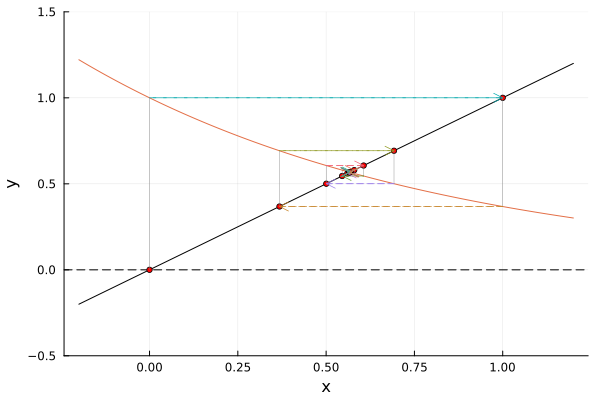

In [21]:
#plotting the given f(x) and visualization of root-finding

using Plots

array_size3=length(x_values3)
y_zeros3 = zeros(array_size3)

x = range(min_x3, max_x3, length=length_x3)
y = f3.(x)
y1= g.(x)

Plots.plot(x, y, ylims=(min_y3, max_y3), legend=true, grid=true, xlabel="x", ylabel="y", color=:black, label="f(x)") #Plots f(x)
plot!(x, y1, ylims=(min_y3, max_y3), legend=true, grid=true, xlabel="x", ylabel="y", label="g(x)") #Plots g(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values3, y_values3, label="Iteration Points", markersize=3, markercolor=:red)

i=1
while i<array_size3
    plot!([x_values3[i],x_values3[i]], [y_values3[i],g(x_values3[i])], label=false, linestyle=:solid, linewidth=0.4,color=:gray)
    quiver!([x_values3[i]], [g(x_values3[i])], quiver=([(x_values3[i+1] - x_values3[i])], [y_values3[i+1]-g(x_values3[i])]),label=false, linewidth=0.7, legend=false, arrow=true, linestyle=:dash)
    i+=1
end

current()

---
## 
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
Bisection Method
</b>
</div>

The Bisection method (also known as binary chopping, interval halving, or Bolzao's method) is a type of incremental search method in which the interval is always divided in half. If a function chnages sign overn an intervalm the function value at the midpoint is evaluated. The location of the root is then determined as lying at the midpoint of the subinterval within which the sign change occurs. 


---

<b> Algorithm fo Bisection Method </b>

1. Select a lower and upper guesses for the root such that the function changes sign over the interval. This cna be checked by ensuring that $f(x_l)f(x_u)<0$.

2. An estimate of the root $x_r$ is determined by $x_r=\frac{(x_l+x_u)}{2}$

3. Make the folllowing evaluation:

    (a) If $f(x_l)f(x_u) < 0$, the root lies in the lower subinterval. Therefore, set $x_u = x_r$, and return to step 2. 

    (b) If $f(x_l)f(x_u) > 0$, the root lies in the lower subinterval. Therefore, set $x_l = x_r$, and return to step 2. 
    
    (c) If $f(x_r) = 0$ or If the absolute difference between $x_l-x_u$ is less than the tolerance value, the root equals $x$; stop.

---

<b> Julia Code for Bisection Method </b>

The function code implements the algorithm for Fixed-Point Method, with an additional input of the maximum number of iterations. The maximum number of iterations is crucial to limit the number of iterations and prevent the code from running indefinitely when the function fails to converge. The tolerance denotes how close the compared values are from one another, and is the basis for convergence. The final value of $x$ is the approximate value of the root for the equation.

In [2]:
## Bisection Method Function

function bisection(f::Function, a, b, eps, N)
    n = 1
    p = 0.0 

    p_values = Float64[]

    while n <= N
        p = a + (b - a) / 2
        push!(p_values, p)

        if f(p) == 0 || abs(a - b) < eps
            println("x is $p and the iteration number is $n")
            return p_values
        end

        if f(a) * f(p) < 0
            b = p
        else
            a = p
        end
        n += 1
    end

    y = f(p)
    println("Method did not converge. The last iteration gives $p with function value $y")
    return p_values
end

bisection (generic function with 1 method)

---

<b> PROBLEM TWO. </b> BISECTION METHOD

INSERT PROBLEM

<b> SOLUTION FOR PROBLEM TWO </b> 

---

<b> ABOUT THE CODE. </b> BISECTION METHOD IMPLEMENTATION FOR PROBLEM TWO

This code computes for the approximate iteration using Bisection Method. It also contains the input parameters such as the $f(x)$, the two initial guess $x_0$, the tolerance value, and the maximum number of iterations. In addition, it also contains the parameters for the graphical plots and visualization of a series of single iterations - showing the convergence (or divergence).

In [12]:
#Input parameters and calling Fixed-Point iteration function

#Function-related
f4(x) = x^5+2x^3-5x-2
a = 0
b = 2
tol4 = 10^(-4.)
N4 = 20

#Plotting-related
max_x4 = 0.9
min_x4 = 1.6
length_x4 = 1000
max_y4 = 5
min_y4 = -5

x_values4=Float64[]
x_values4=bisection(f4,a,b,tol3,N4);

x is 1.319671630859375 and the iteration number is 16


In [13]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values4=Float64[]

for x in x_values4
    push!(y_values4, f4(x))
end

tabulize(x_values4, y_values4)

Row,x,f_x,Approximate_error
,Float64,Float64,Float64
1,1.0,-4.0,NaN
2,1.5,4.84375,33.3333
3,1.25,-1.29199,20.0
4,1.375,1.23911,9.09091
5,1.3125,-0.145625,4.7619
6,1.34375,0.515165,2.32558
7,1.32812,0.177105,1.17647
8,1.32031,0.0138514,0.591716
9,1.31641,-0.0663554,0.296736


---

<b> ABOUT THE CODE. </b> PLOTTING THE RESULT FROM PROBLEM 2

INSERT EXPLANATION

In [11]:
using Plots
f4(x)= (x)^5+2(x)^3-5(x)-2

array_size4=length(x_values4)
y_zeros4 = zeros(array_size4)

x = range(min_x4, max_x4, length=length_x4)
y = f4.(x)

Plots.plot(x, y, ylims=(min_y4, max_y4), color=:blue, legend=false, grid=true, xlabel="x", ylabel="f(x)") #Plots f(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values4, y_values4, label="Iteration Points", markersize=5, markercolor=:red)
scatter!([x_values4[1],x_values4[2]], [y_values4[1],y_values4[2]], label=false, color=:green, markersize=4) #Marks initial guesses x0,x1 as green

i=3
while i<array_size4
    quiver!([x_values4[i-2]], [y_values4[i-2]], quiver=([(x_values4[i] - x_values4[i-2])], [0]),label=false, color=:black, linewidth=0.7, legend=false, arrow=true, linestyle=:dash)
    quiver!([x_values4[i-1]], [y_values4[i-1]], quiver=([(x_values4[i] - x_values4[i-1])], [0]),label=false, color=:black, linewidth=0.7, legend=false, arrow=true, linestyle=:dash)

    i+=1
end

i=3
while i<array_size4
    plot!([x_values4[i],x_values4[i]], [y_values4[i-2],y_values4[i-1]], label=false, linestyle=:solid, linewidth=1)
    i+=1
end

current()

UndefVarError: UndefVarError: `y_values4` not defined

---
## 
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
Newton-Raphson Method
</b>
</div>

Newton-Raphson's Method, is another iteration method for solving $f(x)=0$, where $f$ is assumed to have a continous derivative $f'$. The method is commonly used because of its simplicity and great speed. The underlying idea is that we approximate the graph of $f$ by suitable tangents. Using an approximate value of $x_0$ obtained from the graph $f$, we let $x_1$ be the point of intersection of the x-axis and thangent to the curve of $f$ at $x_0$.



---

<b> Algorithm for Newton-Raphson Method </b>

1. Calculate the derivative $f'(x)$.

2. Make an initial guess.

3. Compute for $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$

4. Make the following evaluation

    (a) If $f(x) = 0$ or If the absolute difference between $x_{n+1}$ and $x_n$ is less than the tolerance value, stop and the final value of $x$ is the approximate root.

    (b) Otherwise, set $x_n = x_{n+1}$ return to step 3.
    
---

<b> Julia Code for Newton-Raphson Method </b>

The function code implements the algorithm for Fixed-Point Method, with an additional input of the maximum number of iterations. The maximum number of iterations is crucial to limit the number of iterations and prevent the code from running indefinitely when the function fails to converge. The tolerance denotes how close the compared values are from one another, and is the basis for convergence. The final value of $x$ is the approximate value of the root for the equation.

In [ ]:
#Newton-Raphson method function
function newtonRaphson(f::Function,fprime::Function,xin,tol,N)
    n=1
    x=0.
    x_values = Float64[xin]
    while n<=N
        x=xin-f(xin)/fprime(xin)
        if f(x)==0 || abs(x-xin)<tol
            println("x is $x and the iteration number is $n")
            return x_values
        end
        push!(x_values,x)
        xin=x
        n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives $x with
        function value $y")
    return x_values
end




---
<b> PROBLEM THREE. </b> NEWTON-RAPHSON METHOD

INSERT PROBLEM

<b> SOLUTION FOR PROBLEM THREE </b> 

---

<b> ABOUT THE CODE. </b> NEWTON-RAPHSON METHOD IMPLEMENTATION FOR PROBLEM THREE

This code computes for the approximate iteration using Newton-Raphson Method. It also contains the input parameters such as $f(x)$ and $f'(x)$, the initial guess $x_0$, the tolerance value, and the maximum number of iterations. In addition, it also contains the parameters for the graphical plots and visualization of a series of single iterations - showing the convergence (or divergence).

In [ ]:
#Input parameters and calling Newton-Raphson method function

#Function-related
f(x) = x.^5 + 2*x.^3 - 5*x .- 2
fprime(x) = 5x.^4+6x.^2-5
xin = 1
tol = 10^(-4.)
N = 20

#Plotting-related
max_x = 1.7
min_x = 0.9
length_x = 1000
max_y = 14
min_y = -5

x_values=Float64[]
x_values=newtonRaphson(f,fprime,xin,tol,N);

<b> ABOUT THE CODE. </b> NEWTON-RAPHSON METHOD IMPLEMENTATION APPROXIMATE ERROR

This code computes for approximate error which is determined by the error estimate:

$\epsilon_a=|\frac{x_{n+1}-x_n}{x_n+1}|100\%$  

In [ ]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values=Float64[]

for x in x_values
    push!(y_values, f(x))
end

tabulize(x_values, y_values)

---
<b> ABOUT THE CODE. </b> PLOTTING THE RESULT FROM PROBLEM THREE

INSERT EXPLANATION

Note increasing opacity and increasing slope as it converges

In [ ]:
#plotting the given f(x) and visualization of root-finding

using Plots

array_size=length(x_values)
y_zeros = zeros(array_size)

x = range(min_x, max_x, length=length_x)
y = f.(x)

Plots.plot(x, y, ylims=(min_y, max_y), legend=false, grid=false, xlabel="x", ylabel="f", color=:black) #Plots f(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values, y_zeros, label=false, color=:black, markersize=3) #Draws points of intersection of tangent lines and x-axis
scatter!(x_values, y_values, label=false, color=:red, markersize=4) #Draws all (x, f(x)) algorithm passes by
scatter!([x_values[1],x_values[1]], [y_values[1],0], label=false, color=:green, markersize=4) #Marks initial guess x0 as green

# for x_point in x_values #Iterates to draw each tangent line for every x passed by
#     alpha = opacity_control/array_size
#     tangent_line(x) = fprime(x_point) * (x - x_point) + f(x_point)
#     plot!(x, tangent_line, label=false, linestyle=:solid, color=:red, alpha=alpha)
# end

i=2
while i<array_size2
    quiver!([x_values[i-1]], [y_values[i-1]], quiver=([(x_values[i] - x_values[i-1])], [-y_values[i-1]]),label=false, linewidth=2, legend=false, arrow=true, linestyle=:solid)
    i+=1
end

for x_point in x_values #Iterates to draw each line from (x,f(x)) to (x,0)
    plot!([x_point, x_point], [f(x_point), 0], label=nothing, linestyle=:dash, color=:black,alpha=0.6)
end

current()



---
##
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
Secant Method
</b>
</div>

The Secant Method is an iterative numerical algoritthm used for approximating the roots of a given nonlinear equation $f(x)=0$. Unlike the Newton-Raphson method, which requires knowledge of the derivative $f(x)$, the Secant Method does not rely on derivative inofrmation. Instead, it approximates the derivative using finite differences between function values at two successive points.

---
<b> Algorithm for Secant Method </b>

1. Make two guesses.

2. Compute for $x_{n+1}=x_n-\frac{f(x_n)(x_{n-1}-x_n)}{f(x_{n-1})-f(x_n)}$

3. Make the following evaluation

    (a) If $f(x) = 0$ or If the absolute difference between $x_{n+1}$ and $x_n$ is less than the tolerance value, stop and the final value of $x$ is the approximate root.

    (b) Otherwise, set $x_n = x_{n+1}$ return to step 2.


---

<b> Julia Code for Secant Method </b>

The function code implements the algorithm for Fixed-Point Method, with an additional input of the maximum number of iterations. The maximum number of iterations is crucial to limit the number of iterations and prevent the code from running indefinitely when the function fails to converge. The tolerance denotes how close the compared values are from one another, and is the basis for convergence. The final value of $x$ is the approximate value of the root for the equation.

In [24]:
#Secant method function

function secant(f::Function,xzero,xone,tol,N)
    n=1
    x=0.
    x_values = Float64[xzero,xone]
    while n<=N
        x=xone-f(xone)*(xone-xzero)/(f(xone)-f(xzero))
        if f(x)==0 || abs(x-xone)<tol
            println("x is $x and the iteration number is $n")
            return x_values
        end
        push!(x_values,x)
        xzero=xone
        xone=x
        n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives xone with
        function value $y")
    return x_values
end


secant (generic function with 1 method)

---
<b> PROBLEM FOUR. </b> SECANT METHOD

INSERT PROBLEM

<b> SOLUTION FOR PROBLEM FOUR </b> 

---

<b> ABOUT THE CODE. </b> SECANT METHOD IMPLEMENTATION FOR PROBLEM FOUR

This code computes for the approximate iteration using the Secant Method. It also contains the input parameters such as the given $f(x)$, the two initial guess $x_0$, the tolerance value, and the maximum number of iterations. In addition, it also contains the parameters for the graphical plots and visualization of a series of single iterations - showing the convergence (or divergence).

In [48]:
#Input parameters and calling Newton-Raphson method function

#Function-related
f2(x) = cos(x)-x
xzero = 0.43    
xone = 1
tol2 = 10^(-4.)
N2 = 20

#Plotting-related
max_x2 = 1.1
min_x2 = 0.32
length_x2 = 1000
max_y2 = 0.5
min_y2 = -0.5

x_values2=Float64[]
x_values2=secant(f2,xzero,xone,tol2,N2);

x is 1.8954942671302635 and the iteration number is 3


<b> ABOUT THE CODE. </b> SECANT METHOD IMPLEMENTATION APPROXIMATE ERROR

This code computes for approximate error which is determined by the error estimate:

$\epsilon_a=|\frac{x_{n+1}-x_n}{x_n+1}|100\%$  

In [49]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values2=Float64[]

for x in x_values2
    push!(y_values2, f2(x))
end

tabulize(x_values2, y_values2)

Row,x,f_x,Approximate_error
,Float64,Float64,Float64
1,2.0,0.181405,NaN
2,1.9,0.00739982,5.26316
3,1.89575,0.000414634,0.224325
4,1.89549,1.07723e-6,0.0133175


---
<b> ABOUT THE CODE. </b> PLOTTING THE RESULT FROM PROBLEM FOUR

INSERT EXPLANATION

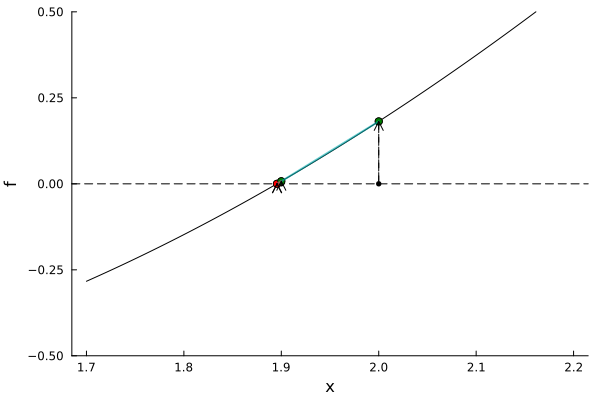

In [50]:
#plotting the given f(x) and visualization of root-finding

using Plots

array_size2=length(x_values2)
y_zeros2 = zeros(array_size2)

x2 = range(min_x2, max_x2, length=length_x2)
y2 = f2.(x2)


Plots.plot(x2, y2, ylims=(min_y2, max_y2), legend=false, grid=false, xlabel="x", ylabel="f", color=:black) #Plots f(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values2, y_zeros2, label=false, color=:black, markersize=3) #Draws points of intersection of tangent lines and x-axis
scatter!(x_values2, y_values2, label=false, color=:red, markersize=4) #Draws all (x, f(x)) algorithm passes by
scatter!([x_values2[1],x_values2[2]], [y_values2[1],y_values2[2]], label=false, color=:green, markersize=4) #Marks initial guesses x0,x1 as green

i=2
while i<array_size2
    # secant_line(x) = ((f2(x_values2[i])-f2(x_values2[i-1]))/(x_values2[i]-x_values2[i-1])) * (x - x_values2[i-1]) + f2(x_values2[i-1])
    # plot!(x2, secant_line, label=false, linestyle=:dash, color=:red, alpha=alpha)
    plot!([x_values2[i],x_values2[i-1]], [y_values2[i],y_values2[i-1]], label=false, linestyle=:solid, linewidth=2,alpha=0.6)
    i+=1
end

for x_point in x_values2 #Iterates to draw each line from (x,f(x)) to (x,0)
    quiver!([x_point], [0], quiver=([0], [f2(x_point)]),label=false, color=:black, linewidth=1, legend=false, arrow=true, linestyle=:dash)
end

current()